##### Imports & load functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def has_high_resource(row):
    # Check if any resource requirement is above 10
    return np.any(np.array(row['job ressource requirement']) > 10)

In [3]:
def convert_to_list(row):
    if isinstance(row, list):
        return row
    # Remove brackets and split on space
    items = row.replace('[', '').replace(']', '').split(' ')
    # Remove any empty strings caused by extra spaces
    items = [item for item in items if item != '']
    # Convert strings to integers
    items = [int(item) for item in items]
    return items

In [4]:
def has_high_length(row):
    # Check if any job length is above 18
    return row['job Length'] > 18

### DeepRM_2

##### Load Data

In [5]:
df_RM2_M1_010 = pd.read_csv('../test/DeepRM_2/anomalyrate_0.10/allocatedJobsM1.csv')
df_RM2_M2_010 = pd.read_csv('../test/DeepRM_2/anomalyrate_0.10/allocatedJobsM2.csv')
df_RM2_M3_010 = pd.read_csv('../test/DeepRM_2/anomalyrate_0.10/allocatedJobsM3.csv')

In [6]:
df_RM2_M1_025 = pd.read_csv('../test/DeepRM_2/anomalyrate_0.25/allocatedJobsM1.csv')
df_RM2_M2_025 = pd.read_csv('../test/DeepRM_2/anomalyrate_0.25/allocatedJobsM2.csv')
df_RM2_M3_025 = pd.read_csv('../test/DeepRM_2/anomalyrate_0.25/allocatedJobsM3.csv')

In [7]:
df_RM2_M1_050 = pd.read_csv('../test/DeepRM_2/anomalyrate_0.50/allocatedJobsM1.csv')
df_RM2_M2_050 = pd.read_csv('../test/DeepRM_2/anomalyrate_0.50/allocatedJobsM2.csv')
df_RM2_M3_050 = pd.read_csv('../test/DeepRM_2/anomalyrate_0.50/allocatedJobsM3.csv')

In [8]:
# Concatenate for each anomaly rate
df_RM2_M1_2_010 = pd.concat([df_RM2_M1_010, df_RM2_M2_010], ignore_index=True)
df_RM2_M1_2_025 = pd.concat([df_RM2_M1_025, df_RM2_M2_025], ignore_index=True)
df_RM2_M1_2_050 = pd.concat([df_RM2_M1_050, df_RM2_M2_050], ignore_index=True)

##### Anomalyrate 0.1

In [9]:
df_RM2_M1_2_010['job ressource requirement'] = df_RM2_M1_2_010['job ressource requirement'].apply(convert_to_list)
df_RM2_M3_010['job ressource requirement'] = df_RM2_M3_010['job ressource requirement'].apply(convert_to_list)

df_RM2_M1_2_010['high_resource'] = df_RM2_M1_2_010.apply(has_high_resource, axis=1)
df_RM2_M3_010['high_resource'] = df_RM2_M3_010.apply(has_high_resource, axis=1)

df_RM2_M1_2_010['high_length'] = df_RM2_M1_2_010.apply(has_high_length, axis=1)
df_RM2_M3_010['high_length'] = df_RM2_M3_010.apply(has_high_length, axis=1)

df_RM2_M1_2_010['high_length_or_resource'] = df_RM2_M1_2_010['high_length'] | df_RM2_M1_2_010['high_resource']
df_RM2_M3_010['high_length_or_resource'] = df_RM2_M3_010['high_length'] | df_RM2_M3_010['high_resource']

edge_high_length_or_resource_RM2_010 = df_RM2_M1_2_010['high_length_or_resource'].sum()
cloud_high_length_or_resource_RM2_010 = df_RM2_M3_010['high_length_or_resource'].sum()

In [10]:
# True negatives 
TN_RM2_010 = len(df_RM2_M1_2_010[(df_RM2_M1_2_010['high_resource'] == False) & (df_RM2_M1_2_010['high_length'] == False)])

# False negatives (anomalous jobs incorrectly identified as non-anomalies)
FN_RM2_010 = len(df_RM2_M1_2_010[(df_RM2_M1_2_010['high_resource'] == True) | (df_RM2_M1_2_010['high_length'] == True)])

# True positives
TP_RM2_010 = len(df_RM2_M3_010[(df_RM2_M3_010['high_resource'] == True) | (df_RM2_M3_010['high_length'] == True)])

# False positives (non-anomalous jobs incorrectly identified as anomalies)
FP_RM2_010 = len(df_RM2_M3_010[(df_RM2_M3_010['high_resource'] == False) & (df_RM2_M3_010['high_length'] == False)])

# Metrics calculation
recall_RM2_010 = float(TP_RM2_010) / (TP_RM2_010 + FN_RM2_010)
precision_RM2_010 = float(TP_RM2_010) / (TP_RM2_010 + FP_RM2_010)
f1_score_RM2_010 = 2 * (precision_RM2_010 * recall_RM2_010) / (precision_RM2_010 + recall_RM2_010)
accuracy_RM2_010 = (TP_RM2_010 + TN_RM2_010) / (TP_RM2_010 + TN_RM2_010 + FP_RM2_010 + FN_RM2_010)

print("TN:", TN_RM2_010, "\n"
      "FN:", FN_RM2_010, "\n"
      "TP:", TP_RM2_010, "\n"
      "FP:", FP_RM2_010, "\n")

print("Recall:", recall_RM2_010, "\n"
      "Precision:", precision_RM2_010, "\n"
      "F1-Score:", f1_score_RM2_010, "\n"
      "Accuracy:", accuracy_RM2_010)

TN: 5037 
FN: 154 
TP: 434 
FP: 594 

Recall: 0.7380952380952381 
Precision: 0.42217898832684825 
F1-Score: 0.537128712871287 
Accuracy: 0.8797234282038913


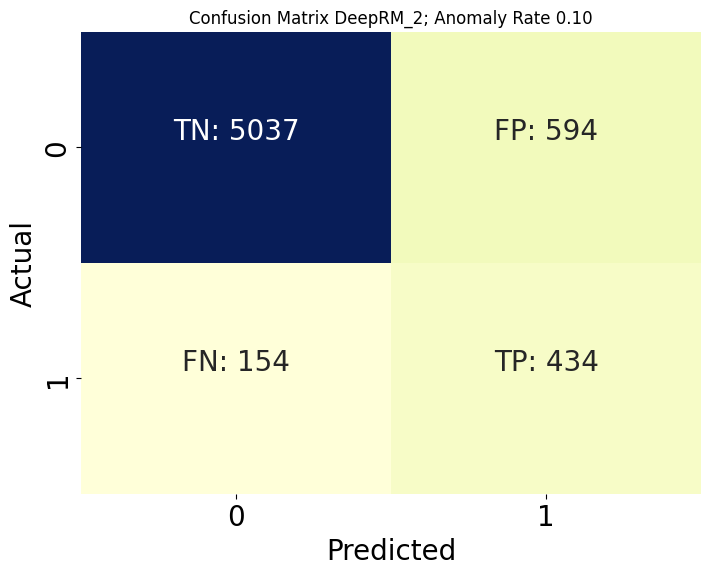

In [11]:
# Confusion matrix
confusion_RM2_010 = [[TN_RM2_010, FP_RM2_010],
                [FN_RM2_010, TP_RM2_010]]

labels = [['TN: {}\n'.format(TN_RM2_010), 'FP: {}\n'.format(FP_RM2_010)], 
          ['FN: {}\n'.format(FN_RM2_010), 'TP: {}\n'.format(TP_RM2_010)]]

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_RM2_010, annot=labels, fmt='', cmap='YlGnBu', cbar=False, annot_kws={"size": 20})
plt.title('Confusion Matrix DeepRM_2; Anomaly Rate 0.10')
plt.ylabel('Actual', fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

##### Anomalyrate 0.25

In [12]:
df_RM2_M1_2_025['job ressource requirement'] = df_RM2_M1_2_025['job ressource requirement'].apply(convert_to_list)
df_RM2_M3_025['job ressource requirement'] = df_RM2_M3_025['job ressource requirement'].apply(convert_to_list)

df_RM2_M1_2_025['high_resource'] = df_RM2_M1_2_025.apply(has_high_resource, axis=1)
df_RM2_M3_025['high_resource'] = df_RM2_M3_025.apply(has_high_resource, axis=1)

df_RM2_M1_2_025['high_length'] = df_RM2_M1_2_025.apply(has_high_length, axis=1)
df_RM2_M3_025['high_length'] = df_RM2_M3_025.apply(has_high_length, axis=1)

df_RM2_M1_2_025['high_length_or_resource'] = df_RM2_M1_2_025['high_length'] | df_RM2_M1_2_025['high_resource']
df_RM2_M3_025['high_length_or_resource'] = df_RM2_M3_025['high_length'] | df_RM2_M3_025['high_resource']

edge_high_length_or_resource_RM2_025 = df_RM2_M1_2_025['high_length_or_resource'].sum()
cloud_high_length_or_resource_RM2_025 = df_RM2_M3_025['high_length_or_resource'].sum()

In [13]:
# True negatives 
TN_RM2_025 = len(df_RM2_M1_2_025[(df_RM2_M1_2_025['high_resource'] == False) & (df_RM2_M1_2_025['high_length'] == False)])

# False negatives (anomalous jobs incorrectly identified as non-anomalies)
FN_RM2_025 = len(df_RM2_M1_2_025[(df_RM2_M1_2_025['high_resource'] == True) | (df_RM2_M1_2_025['high_length'] == True)])

# True positives
TP_RM2_025 = len(df_RM2_M3_025[(df_RM2_M3_025['high_resource'] == True) | (df_RM2_M3_025['high_length'] == True)])

# False positives (non-anomalous jobs incorrectly identified as anomalies)
FP_RM2_025 = len(df_RM2_M3_025[(df_RM2_M3_025['high_resource'] == False) & (df_RM2_M3_025['high_length'] == False)])

# Metrics calculation
recall_RM2_025 = float(TP_RM2_025) / (TP_RM2_025 + FN_RM2_025)
precision_RM2_025 = float(TP_RM2_025) / (TP_RM2_025 + FP_RM2_025)
f1_score_RM2_025 = 2 * (precision_RM2_025 * recall_RM2_025) / (precision_RM2_025 + recall_RM2_025)
accuracy_RM2_025 = (TP_RM2_025 + TN_RM2_025) / (TP_RM2_025 + TN_RM2_025 + FP_RM2_025 + FN_RM2_025)

print("TN:", TN_RM2_025, "\n"
      "FN:", FN_RM2_025, "\n"
      "TP:", TP_RM2_025, "\n"
      "FP:", FP_RM2_025, "\n")

print("Recall:", recall_RM2_025, "\n"
      "Precision:", precision_RM2_025, "\n"
      "F1-Score:", f1_score_RM2_025, "\n"
      "Accuracy:", accuracy_RM2_025)

TN: 4079 
FN: 337 
TP: 1029 
FP: 754 

Recall: 0.753294289897511 
Precision: 0.5771172181716209 
F1-Score: 0.6535408066052715 
Accuracy: 0.8240038715921922


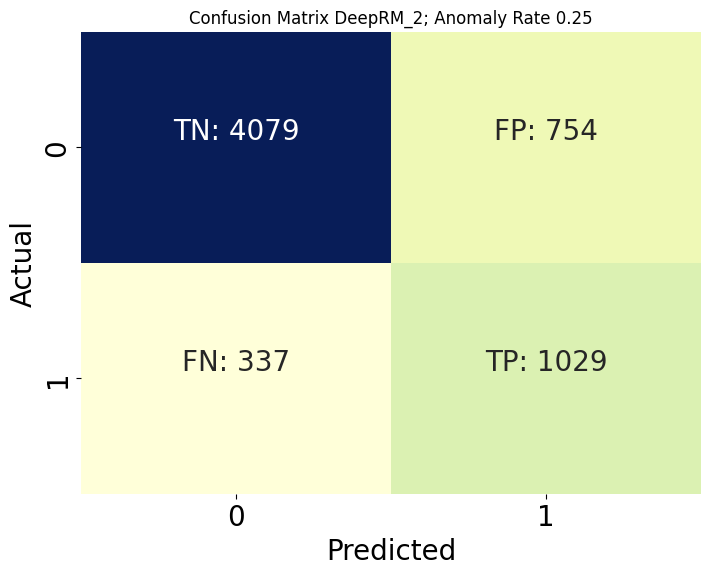

In [14]:
# Confusion matrix
confusion_RM2_025 = [[TN_RM2_025, FP_RM2_025],
                [FN_RM2_025, TP_RM2_025]]

labels = [['TN: {}\n'.format(TN_RM2_025), 'FP: {}\n'.format(FP_RM2_025)], 
          ['FN: {}\n'.format(FN_RM2_025), 'TP: {}\n'.format(TP_RM2_025)]]

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_RM2_025, annot=labels, fmt='', cmap='YlGnBu', cbar=False, annot_kws={"size": 20})
plt.title('Confusion Matrix DeepRM_2; Anomaly Rate 0.25')
plt.ylabel('Actual', fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

##### Anomalyrate 0.5

In [15]:
df_RM2_M1_2_050['job ressource requirement'] = df_RM2_M1_2_050['job ressource requirement'].apply(convert_to_list)
df_RM2_M3_050['job ressource requirement'] = df_RM2_M3_050['job ressource requirement'].apply(convert_to_list)

df_RM2_M1_2_050['high_resource'] = df_RM2_M1_2_050.apply(has_high_resource, axis=1)
df_RM2_M3_050['high_resource'] = df_RM2_M3_050.apply(has_high_resource, axis=1)

df_RM2_M1_2_050['high_length'] = df_RM2_M1_2_050.apply(has_high_length, axis=1)
df_RM2_M3_050['high_length'] = df_RM2_M3_050.apply(has_high_length, axis=1)

df_RM2_M1_2_050['high_length_or_resource'] = df_RM2_M1_2_050['high_length'] | df_RM2_M1_2_050['high_resource']
df_RM2_M3_050['high_length_or_resource'] = df_RM2_M3_050['high_length'] | df_RM2_M3_050['high_resource']

edge_high_length_or_resource_RM2_050 = df_RM2_M1_2_050['high_length_or_resource'].sum()
cloud_high_length_or_resource_RM2_050 = df_RM2_M3_050['high_length_or_resource'].sum()

In [16]:
# True negatives 
TN_RM2_050 = len(df_RM2_M1_2_050[(df_RM2_M1_2_050['high_resource'] == False) & (df_RM2_M1_2_050['high_length'] == False)])

# False negatives (anomalous jobs incorrectly identified as non-anomalies)
FN_RM2_050 = len(df_RM2_M1_2_050[(df_RM2_M1_2_050['high_resource'] == True) | (df_RM2_M1_2_050['high_length'] == True)])

# True positives
TP_RM2_050 = len(df_RM2_M3_050[(df_RM2_M3_050['high_resource'] == True) | (df_RM2_M3_050['high_length'] == True)])

# False positives (non-anomalous jobs incorrectly identified as anomalies)
FP_RM2_050 = len(df_RM2_M3_050[(df_RM2_M3_050['high_resource'] == False) & (df_RM2_M3_050['high_length'] == False)])

# Metrics calculation
recall_RM2_050 = float(TP_RM2_050) / (TP_RM2_050 + FN_RM2_050)
precision_RM2_050 = float(TP_RM2_050) / (TP_RM2_050 + FP_RM2_050)
f1_score_RM2_050 = 2 * (precision_RM2_050 * recall_RM2_050) / (precision_RM2_050 + recall_RM2_050)
accuracy_RM2_050 = (TP_RM2_050 + TN_RM2_050) / (TP_RM2_050 + TN_RM2_050 + FP_RM2_050 + FN_RM2_050)

print("TN:", TN_RM2_050, "\n"
      "FN:", FN_RM2_050, "\n"
      "TP:", TP_RM2_050, "\n"
      "FP:", FP_RM2_050, "\n")

print("Recall:", recall_RM2_050, "\n"
      "Precision:", precision_RM2_050, "\n"
      "F1-Score:", f1_score_RM2_050, "\n"
      "Accuracy:", accuracy_RM2_050)

TN: 2732 
FN: 541 
TP: 2156 
FP: 829 

Recall: 0.7994067482387839 
Precision: 0.7222780569514238 
F1-Score: 0.7588877155931011 
Accuracy: 0.7810802173218281


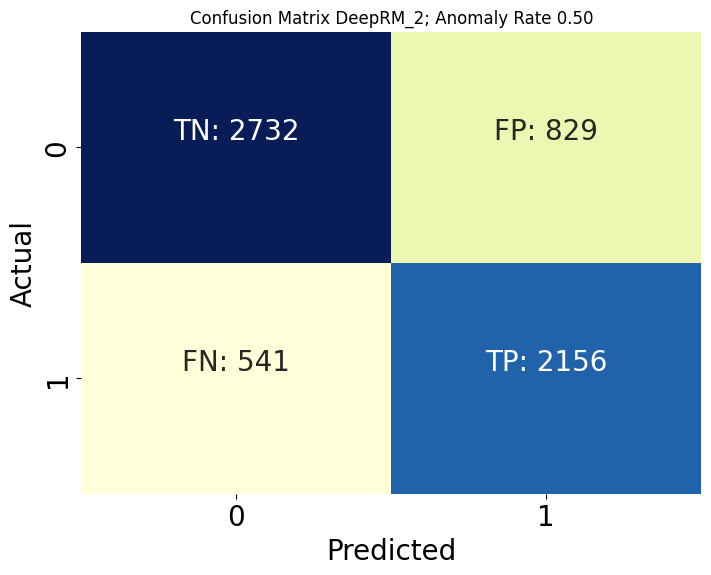

In [17]:
# Confusion matrix
confusion_RM2_050 = [[TN_RM2_050, FP_RM2_050],
                [FN_RM2_050, TP_RM2_050]]

labels = [['TN: {}\n'.format(TN_RM2_050), 'FP: {}\n'.format(FP_RM2_050)], 
          ['FN: {}\n'.format(FN_RM2_050), 'TP: {}\n'.format(TP_RM2_050)]]

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_RM2_050, annot=labels, fmt='', cmap='YlGnBu', cbar=False, annot_kws={"size": 20})
plt.title('Confusion Matrix DeepRM_2; Anomaly Rate 0.50')
plt.ylabel('Actual', fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### DeepRM_ECO

##### Load Data

In [18]:
df_RME_M1_010 = pd.read_csv('../test/DeepRM_ECO/anomalyrate_0.10/allocatedJobsM1.csv')
df_RME_M2_010 = pd.read_csv('../test/DeepRM_ECO/anomalyrate_0.10/allocatedJobsM2.csv')
df_RME_M3_010 = pd.read_csv('../test/DeepRM_ECO/anomalyrate_0.10/allocatedJobsM3.csv')

In [19]:
df_RME_M1_025 = pd.read_csv('../test/DeepRM_ECO/anomalyrate_0.25/allocatedJobsM1.csv')
df_RME_M2_025 = pd.read_csv('../test/DeepRM_ECO/anomalyrate_0.25/allocatedJobsM2.csv')
df_RME_M3_025 = pd.read_csv('../test/DeepRM_ECO/anomalyrate_0.25/allocatedJobsM3.csv')

In [20]:
df_RME_M1_050 = pd.read_csv('../test/DeepRM_ECO/anomalyrate_0.50/allocatedJobsM1.csv')
df_RME_M2_050 = pd.read_csv('../test/DeepRM_ECO/anomalyrate_0.50/allocatedJobsM2.csv')
df_RME_M3_050 = pd.read_csv('../test/DeepRM_ECO/anomalyrate_0.50/allocatedJobsM3.csv')

In [21]:
# Concatenate for each anomaly rate
df_RME_M1_2_010 = pd.concat([df_RME_M1_010, df_RME_M2_010], ignore_index=True)
df_RME_M1_2_025 = pd.concat([df_RME_M1_025, df_RME_M2_025], ignore_index=True)
df_RME_M1_2_050 = pd.concat([df_RME_M1_050, df_RME_M2_050], ignore_index=True)

##### Anomalyrate 0.1

In [22]:
df_RME_M1_2_010['job ressource requirement'] = df_RME_M1_2_010['job ressource requirement'].apply(convert_to_list)
df_RME_M3_010['job ressource requirement'] = df_RME_M3_010['job ressource requirement'].apply(convert_to_list)

df_RME_M1_2_010['high_resource'] = df_RME_M1_2_010.apply(has_high_resource, axis=1)
df_RME_M3_010['high_resource'] = df_RME_M3_010.apply(has_high_resource, axis=1)

df_RME_M1_2_010['high_length'] = df_RME_M1_2_010.apply(has_high_length, axis=1)
df_RME_M3_010['high_length'] = df_RME_M3_010.apply(has_high_length, axis=1)

df_RME_M1_2_010['high_length_or_resource'] = df_RME_M1_2_010['high_length'] | df_RME_M1_2_010['high_resource']
df_RME_M3_010['high_length_or_resource'] = df_RME_M3_010['high_length'] | df_RME_M3_010['high_resource']

edge_high_length_or_resource_RME_010 = df_RME_M1_2_010['high_length_or_resource'].sum()
cloud_high_length_or_resource_RME_010 = df_RME_M3_010['high_length_or_resource'].sum()

In [23]:
# True negatives 
TN_RME_010 = len(df_RME_M1_2_010[(df_RME_M1_2_010['high_resource'] == False) & (df_RME_M1_2_010['high_length'] == False)])

# False negatives (anomalous jobs incorrectly identified as non-anomalies)
FN_RME_010 = len(df_RME_M1_2_010[(df_RME_M1_2_010['high_resource'] == True) | (df_RME_M1_2_010['high_length'] == True)])

# True positives
TP_RME_010 = len(df_RME_M3_010[(df_RME_M3_010['high_resource'] == True) | (df_RME_M3_010['high_length'] == True)])

# False positives (non-anomalous jobs incorrectly identified as anomalies)
FP_RME_010 = len(df_RME_M3_010[(df_RME_M3_010['high_resource'] == False) & (df_RME_M3_010['high_length'] == False)])

# Metrics calculation
recall_RME_010 = float(TP_RME_010) / (TP_RME_010 + FN_RME_010)
precision_RME_010 = float(TP_RME_010) / (TP_RME_010 + FP_RME_010)
f1_score_RME_010 = 2 * (precision_RME_010 * recall_RME_010) / (precision_RME_010 + recall_RME_010)
accuracy_RME_010 = (TP_RME_010 + TN_RME_010) / (TP_RME_010 + TN_RME_010 + FP_RME_010 + FN_RME_010)

print("TN:", TN_RME_010, "\n"
      "FN:", FN_RME_010, "\n"
      "TP:", TP_RME_010, "\n"
      "FP:", FP_RME_010, "\n")

print("Recall:", recall_RME_010, "\n"
      "Precision:", precision_RME_010, "\n"
      "F1-Score:", f1_score_RME_010, "\n"
      "Accuracy:", accuracy_RME_010)

TN: 4500 
FN: 98 
TP: 404 
FP: 1078 

Recall: 0.8047808764940239 
Precision: 0.2726045883940621 
F1-Score: 0.4072580645161291 
Accuracy: 0.8065789473684211


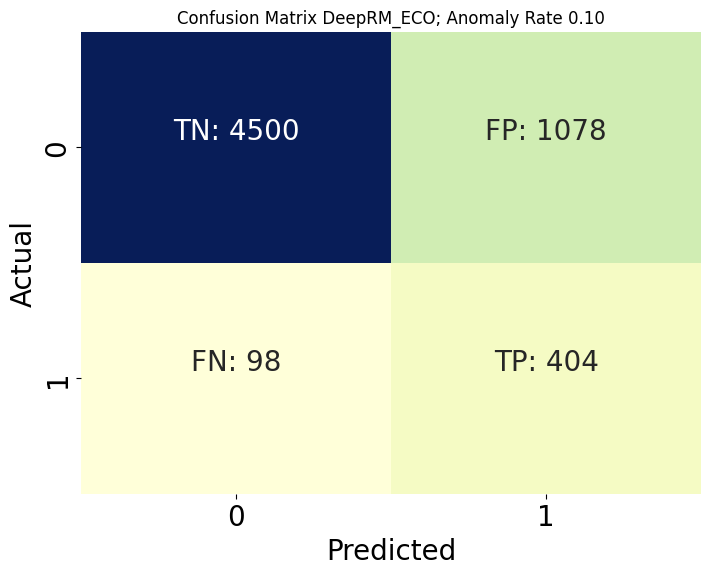

In [24]:
# Confusion matrix
confusion_RME_010 = [[TN_RME_010, FP_RME_010],
                [FN_RME_010, TP_RME_010]]

labels = [['TN: {}\n'.format(TN_RME_010), 'FP: {}\n'.format(FP_RME_010)], 
          ['FN: {}\n'.format(FN_RME_010), 'TP: {}\n'.format(TP_RME_010)]]

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_RME_010, annot=labels, fmt='', cmap='YlGnBu', cbar=False, annot_kws={"size": 20})
plt.title('Confusion Matrix DeepRM_ECO; Anomaly Rate 0.10')
plt.ylabel('Actual', fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

##### Anomalyrate 0.25

In [25]:
df_RME_M1_2_025['job ressource requirement'] = df_RME_M1_2_025['job ressource requirement'].apply(convert_to_list)
df_RME_M3_025['job ressource requirement'] = df_RME_M3_025['job ressource requirement'].apply(convert_to_list)

df_RME_M1_2_025['high_resource'] = df_RME_M1_2_025.apply(has_high_resource, axis=1)
df_RME_M3_025['high_resource'] = df_RME_M3_025.apply(has_high_resource, axis=1)

df_RME_M1_2_025['high_length'] = df_RME_M1_2_025.apply(has_high_length, axis=1)
df_RME_M3_025['high_length'] = df_RME_M3_025.apply(has_high_length, axis=1)

df_RME_M1_2_025['high_length_or_resource'] = df_RME_M1_2_025['high_length'] | df_RME_M1_2_025['high_resource']
df_RME_M3_025['high_length_or_resource'] = df_RME_M3_025['high_length'] | df_RME_M3_025['high_resource']

edge_high_length_or_resource_RME_025 = df_RME_M1_2_025['high_length_or_resource'].sum()
cloud_high_length_or_resource_RME_025 = df_RME_M3_025['high_length_or_resource'].sum()


In [26]:
# True negatives 
TN_RME_025 = len(df_RME_M1_2_025[(df_RME_M1_2_025['high_resource'] == False) & (df_RME_M1_2_025['high_length'] == False)])

# False negatives (anomalous jobs incorrectly identified as non-anomalies)
FN_RME_025 = len(df_RME_M1_2_025[(df_RME_M1_2_025['high_resource'] == True) | (df_RME_M1_2_025['high_length'] == True)])

# True positives
TP_RME_025 = len(df_RME_M3_025[(df_RME_M3_025['high_resource'] == True) | (df_RME_M3_025['high_length'] == True)])

# False positives (non-anomalous jobs incorrectly identified as anomalies)
FP_RME_025 = len(df_RME_M3_025[(df_RME_M3_025['high_resource'] == False) & (df_RME_M3_025['high_length'] == False)])

# Metrics calculation
recall_RME_025 = float(TP_RME_025) / (TP_RME_025 + FN_RME_025)
precision_RME_025 = float(TP_RME_025) / (TP_RME_025 + FP_RME_025)
f1_score_RME_025 = 2 * (precision_RME_025 * recall_RME_025) / (precision_RME_025 + recall_RME_025)
accuracy_RME_025 = (TP_RME_025 + TN_RME_025) / (TP_RME_025 + TN_RME_025 + FP_RME_025 + FN_RME_025)

print("TN:", TN_RME_025, "\n"
      "FN:", FN_RME_025, "\n"
      "TP:", TP_RME_025, "\n"
      "FP:", FP_RME_025, "\n")

print("Recall:", recall_RME_025, "\n"
      "Precision:", precision_RME_025, "\n"
      "F1-Score:", f1_score_RME_025, "\n"
      "Accuracy:", accuracy_RME_025)

TN: 3624 
FN: 217 
TP: 910 
FP: 1067 

Recall: 0.8074534161490683 
Precision: 0.4602933737986849 
F1-Score: 0.5863402061855669 
Accuracy: 0.7793056033001031


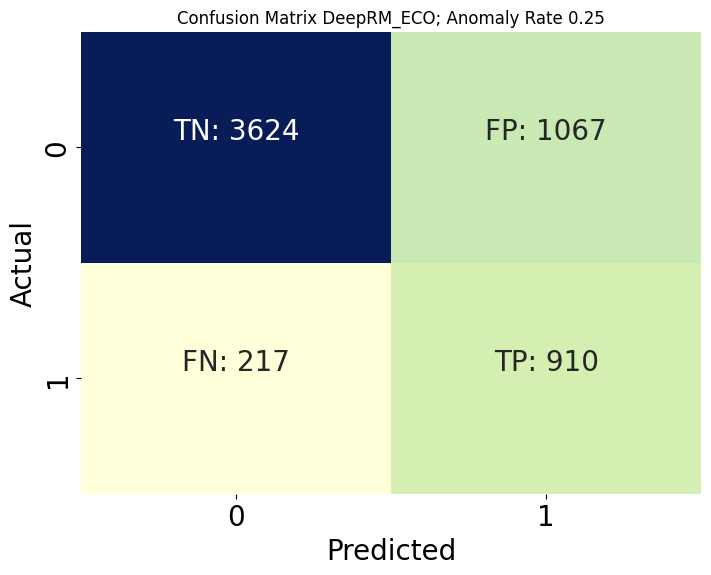

In [27]:
# Confusion matrix
confusion_RME_025 = [[TN_RME_025, FP_RME_025],
                [FN_RME_025, TP_RME_025]]

labels = [['TN: {}\n'.format(TN_RME_025), 'FP: {}\n'.format(FP_RME_025)], 
          ['FN: {}\n'.format(FN_RME_025), 'TP: {}\n'.format(TP_RME_025)]]

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_RME_025, annot=labels, fmt='', cmap='YlGnBu', cbar=False, annot_kws={"size": 20})
plt.title('Confusion Matrix DeepRM_ECO; Anomaly Rate 0.25')
plt.ylabel('Actual', fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

##### Anomalyrate 0.5

In [28]:
df_RME_M1_2_050['job ressource requirement'] = df_RME_M1_2_050['job ressource requirement'].apply(convert_to_list)
df_RME_M3_050['job ressource requirement'] = df_RME_M3_050['job ressource requirement'].apply(convert_to_list)

df_RME_M1_2_050['high_resource'] = df_RME_M1_2_050.apply(has_high_resource, axis=1)
df_RME_M3_050['high_resource'] = df_RME_M3_050.apply(has_high_resource, axis=1)

df_RME_M1_2_050['high_length'] = df_RME_M1_2_050.apply(has_high_length, axis=1)
df_RME_M3_050['high_length'] = df_RME_M3_050.apply(has_high_length, axis=1)

df_RME_M1_2_050['high_length_or_resource'] = df_RME_M1_2_050['high_length'] | df_RME_M1_2_050['high_resource']
df_RME_M3_050['high_length_or_resource'] = df_RME_M3_050['high_length'] | df_RME_M3_050['high_resource']

edge_high_length_or_resource_RME_050 = df_RME_M1_2_050['high_length_or_resource'].sum()
cloud_high_length_or_resource_RME_050 = df_RME_M3_050['high_length_or_resource'].sum()

In [29]:
# True negatives 
TN_RME_050 = len(df_RME_M1_2_050[(df_RME_M1_2_050['high_resource'] == False) & (df_RME_M1_2_050['high_length'] == False)])

# False negatives (anomalous jobs incorrectly identified as non-anomalies)
FN_RME_050 = len(df_RME_M1_2_050[(df_RME_M1_2_050['high_resource'] == True) | (df_RME_M1_2_050['high_length'] == True)])

# True positives
TP_RME_050 = len(df_RME_M3_050[(df_RME_M3_050['high_resource'] == True) | (df_RME_M3_050['high_length'] == True)])

# False positives (non-anomalous jobs incorrectly identified as anomalies)
FP_RME_050 = len(df_RME_M3_050[(df_RME_M3_050['high_resource'] == False) & (df_RME_M3_050['high_length'] == False)])

# Metrics calculation
recall_RME_050 = float(TP_RME_050) / (TP_RME_050 + FN_RME_050)
precision_RME_050 = float(TP_RME_050) / (TP_RME_050 + FP_RME_050)
f1_score_RME_050 = 2 * (precision_RME_050 * recall_RME_050) / (precision_RME_050 + recall_RME_050)
accuracy_RME_050 = (TP_RME_050 + TN_RME_050) / (TP_RME_050 + TN_RME_050 + FP_RME_050 + FN_RME_050)

print("TN:", TN_RME_050, "\n"
      "FN:", FN_RME_050, "\n"
      "TP:", TP_RME_050, "\n"
      "FP:", FP_RME_050, "\n")

print("Recall:", recall_RME_050, "\n"
      "Precision:", precision_RME_050, "\n"
      "F1-Score:", f1_score_RME_050, "\n"
      "Accuracy:", accuracy_RME_050)

TN: 2455 
FN: 397 
TP: 1790 
FP: 909 

Recall: 0.8184727937814358 
Precision: 0.6632085957762134 
F1-Score: 0.732705689725747 
Accuracy: 0.764727076202486


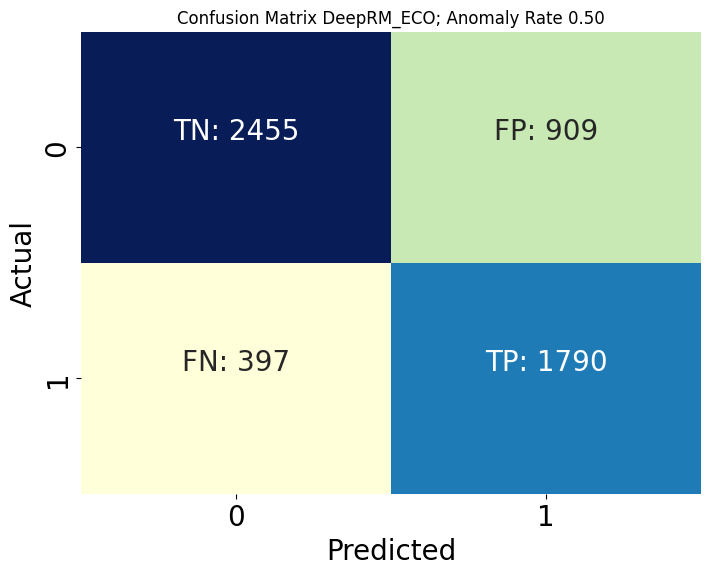

In [30]:
# Confusion matrix
confusion_RME_050 = [[TN_RME_050, FP_RME_050],
                [FN_RME_050, TP_RME_050]]

labels = [['TN: {}\n'.format(TN_RME_050), 'FP: {}\n'.format(FP_RME_050)], 
          ['FN: {}\n'.format(FN_RME_050), 'TP: {}\n'.format(TP_RME_050)]]

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_RME_050, annot=labels, fmt='', cmap='YlGnBu', cbar=False, annot_kws={"size": 20})
plt.title('Confusion Matrix DeepRM_ECO; Anomaly Rate 0.50')
plt.ylabel('Actual', fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### DeepRM_ECO (3000 Epochs)

##### Load Data

In [31]:
df_RME2_M1_010 = pd.read_csv('../test/DeepRM_ECO_3000/anomalyrate_0.10/allocatedJobsM1.csv')
df_RME2_M2_010 = pd.read_csv('../test/DeepRM_ECO_3000/anomalyrate_0.10/allocatedJobsM2.csv')
df_RME2_M3_010 = pd.read_csv('../test/DeepRM_ECO_3000/anomalyrate_0.10/allocatedJobsM3.csv')

In [32]:
df_RME2_M1_025 = pd.read_csv('../test/DeepRM_ECO_3000/anomalyrate_0.25/allocatedJobsM1.csv')
df_RME2_M2_025 = pd.read_csv('../test/DeepRM_ECO_3000/anomalyrate_0.25/allocatedJobsM2.csv')
df_RME2_M3_025 = pd.read_csv('../test/DeepRM_ECO_3000/anomalyrate_0.25/allocatedJobsM3.csv')

In [33]:
df_RME2_M1_050 = pd.read_csv('../test/DeepRM_ECO_3000/anomalyrate_0.50/allocatedJobsM1.csv')
df_RME2_M2_050 = pd.read_csv('../test/DeepRM_ECO_3000/anomalyrate_0.50/allocatedJobsM2.csv')
df_RME2_M3_050 = pd.read_csv('../test/DeepRM_ECO_3000/anomalyrate_0.50/allocatedJobsM3.csv')

In [34]:
# Concatenate for each anomaly rate
df_RME2_M1_2_010 = pd.concat([df_RME2_M1_010, df_RME2_M2_010], ignore_index=True)
df_RME2_M1_2_025 = pd.concat([df_RME2_M1_025, df_RME2_M2_025], ignore_index=True)
df_RME2_M1_2_050 = pd.concat([df_RME2_M1_050, df_RME2_M2_050], ignore_index=True)

##### Anomalyrate 0.10

In [35]:
df_RME2_M1_2_010['job ressource requirement'] = df_RME2_M1_2_010['job ressource requirement'].apply(convert_to_list)
df_RME2_M3_010['job ressource requirement'] = df_RME2_M3_010['job ressource requirement'].apply(convert_to_list)

df_RME2_M1_2_010['high_resource'] = df_RME2_M1_2_010.apply(has_high_resource, axis=1)
df_RME2_M3_010['high_resource'] = df_RME2_M3_010.apply(has_high_resource, axis=1)

df_RME2_M1_2_010['high_length'] = df_RME2_M1_2_010.apply(has_high_length, axis=1)
df_RME2_M3_010['high_length'] = df_RME2_M3_010.apply(has_high_length, axis=1)

df_RME2_M1_2_010['high_length_or_resource'] = df_RME2_M1_2_010['high_length'] | df_RME2_M1_2_010['high_resource']
df_RME2_M3_010['high_length_or_resource'] = df_RME2_M3_010['high_length'] | df_RME2_M3_010['high_resource']

edge_high_length_or_resource_RME2_010 = df_RME2_M1_2_010['high_length_or_resource'].sum()
cloud_high_length_or_resource_RME2_010 = df_RME2_M3_010['high_length_or_resource'].sum()

In [36]:
# True negatives 
TN_RME2_010 = len(df_RME2_M1_2_010[(df_RME2_M1_2_010['high_resource'] == False) & (df_RME2_M1_2_010['high_length'] == False)])

# False negatives (anomalous jobs incorrectly identified as non-anomalies)
FN_RME2_010 = len(df_RME2_M1_2_010[(df_RME2_M1_2_010['high_resource'] == True) | (df_RME2_M1_2_010['high_length'] == True)])

# True positives
TP_RME2_010 = len(df_RME2_M3_010[(df_RME2_M3_010['high_resource'] == True) | (df_RME2_M3_010['high_length'] == True)])

# False positives (non-anomalous jobs incorrectly identified as anomalies)
FP_RME2_010 = len(df_RME2_M3_010[(df_RME2_M3_010['high_resource'] == False) & (df_RME2_M3_010['high_length'] == False)])

# Metrics calculation
recall_RME2_010 = float(TP_RME2_010) / (TP_RME2_010 + FN_RME2_010)
precision_RME2_010 = float(TP_RME2_010) / (TP_RME2_010 + FP_RME2_010)
f1_score_RME2_010 = 2 * (precision_RME2_010 * recall_RME2_010) / (precision_RME2_010 + recall_RME2_010)
accuracy_RME2_010 = (TP_RME2_010 + TN_RME2_010) / (TP_RME2_010 + TN_RME2_010 + FP_RME2_010 + FN_RME2_010)

print("TN:", TN_RME2_010, "\n"
      "FN:", FN_RME2_010, "\n"
      "TP:", TP_RME2_010, "\n"
      "FP:", FP_RME2_010, "\n")

print("Recall:", recall_RME2_010, "\n"
      "Precision:", precision_RME2_010, "\n"
      "F1-Score:", f1_score_RME2_010, "\n"
      "Accuracy:", accuracy_RME2_010)

TN: 4223 
FN: 202 
TP: 197 
FP: 1185 

Recall: 0.49373433583959897 
Precision: 0.14254703328509408 
F1-Score: 0.22122403144300956 
Accuracy: 0.7611503358016187


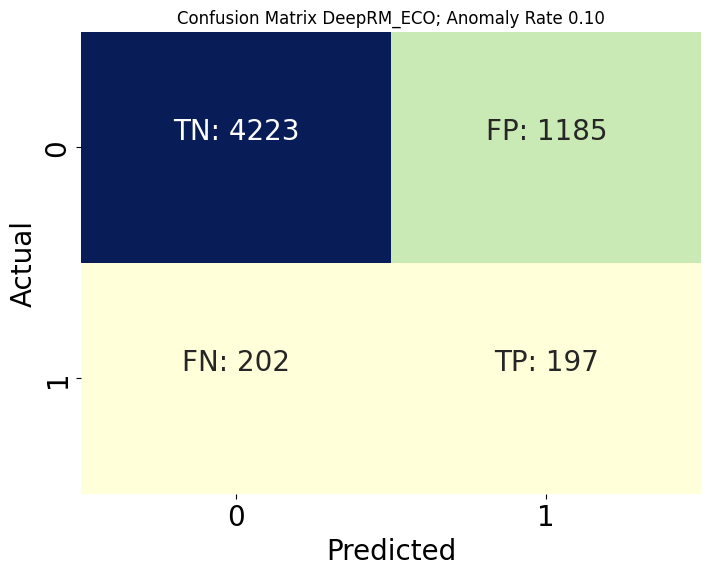

In [37]:
# Confusion matrix
confusion_RME2_010 = [[TN_RME2_010, FP_RME2_010],
                [FN_RME2_010, TP_RME2_010]]

labels = [['TN: {}\n'.format(TN_RME2_010), 'FP: {}\n'.format(FP_RME2_010)], 
          ['FN: {}\n'.format(FN_RME2_010), 'TP: {}\n'.format(TP_RME2_010)]]

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_RME2_010, annot=labels, fmt='', cmap='YlGnBu', cbar=False, annot_kws={"size": 20})
plt.title('Confusion Matrix DeepRM_ECO; Anomaly Rate 0.10')
plt.ylabel('Actual', fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

##### Anomalyrate 0.25

In [46]:
df_RME2_M1_2_025['job ressource requirement'] = df_RME2_M1_2_025['job ressource requirement'].apply(convert_to_list)
df_RME2_M3_025['job ressource requirement'] = df_RME2_M3_025['job ressource requirement'].apply(convert_to_list)

df_RME2_M1_2_025['high_resource'] = df_RME2_M1_2_025.apply(has_high_resource, axis=1)
df_RME2_M3_025['high_resource'] = df_RME2_M3_025.apply(has_high_resource, axis=1)

df_RME2_M1_2_025['high_length'] = df_RME2_M1_2_025.apply(has_high_length, axis=1)
df_RME2_M3_025['high_length'] = df_RME2_M3_025.apply(has_high_length, axis=1)

df_RME2_M1_2_025['high_length_or_resource'] = df_RME2_M1_2_025['high_length'] | df_RME2_M1_2_025['high_resource']
df_RME2_M3_025['high_length_or_resource'] = df_RME2_M3_025['high_length'] | df_RME2_M3_025['high_resource']

edge_high_length_or_resource_RME2_025 = df_RME2_M1_2_025['high_length_or_resource'].sum()
cloud_high_length_or_resource_RME2_025 = df_RME2_M3_025['high_length_or_resource'].sum()

In [47]:
# True negatives 
TN_RME2_025 = len(df_RME2_M1_2_025[(df_RME2_M1_2_025['high_resource'] == False) & (df_RME2_M1_2_025['high_length'] == False)])

# False negatives (anomalous jobs incorrectly identified as non-anomalies)
FN_RME2_025 = len(df_RME2_M1_2_025[(df_RME2_M1_2_025['high_resource'] == True) | (df_RME2_M1_2_025['high_length'] == True)])

# True positives
TP_RME2_025 = len(df_RME2_M3_025[(df_RME2_M3_025['high_resource'] == True) | (df_RME2_M3_025['high_length'] == True)])

# False positives (non-anomalous jobs incorrectly identified as anomalies)
FP_RME2_025 = len(df_RME2_M3_025[(df_RME2_M3_025['high_resource'] == False) & (df_RME2_M3_025['high_length'] == False)])

# Metrics calculation
recall_RME2_025 = float(TP_RME2_025) / (TP_RME2_025 + FN_RME2_025)
precision_RME2_025 = float(TP_RME2_025) / (TP_RME2_025 + FP_RME2_025)
f1_score_RME2_025 = 2 * (precision_RME2_025 * recall_RME2_025) / (precision_RME2_025 + recall_RME2_025)
accuracy_RME2_025 = (TP_RME2_025 + TN_RME2_025) / (TP_RME2_025 + TN_RME2_025 + FP_RME2_025 + FN_RME2_025)

print("TN:", TN_RME2_025, "\n"
      "FN:", FN_RME2_025, "\n"
      "TP:", TP_RME2_025, "\n"
      "FP:", FP_RME2_025, "\n")

print("Recall:", recall_RME2_025, "\n"
      "Precision:", precision_RME2_025, "\n"
      "F1-Score:", f1_score_RME2_025, "\n"
      "Accuracy:", accuracy_RME2_025)


TN: 3396 
FN: 387 
TP: 540 
FP: 1015 

Recall: 0.5825242718446602 
Precision: 0.34726688102893893 
F1-Score: 0.435132957292506 
Accuracy: 0.7373548145372799


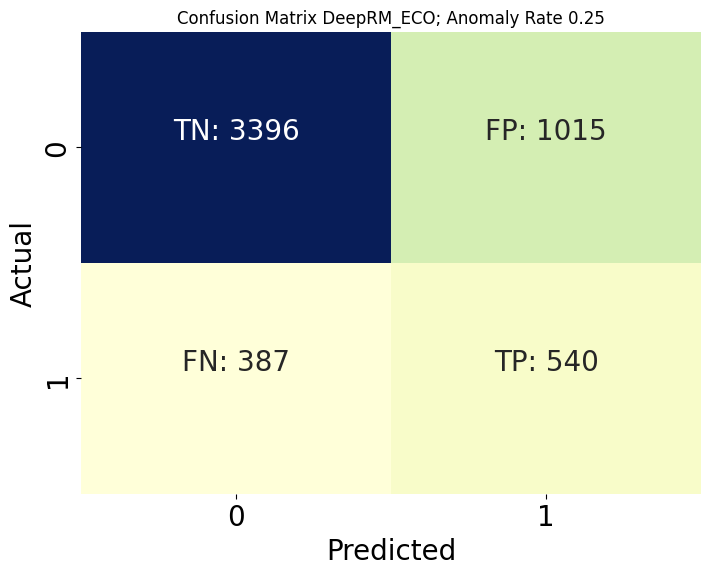

In [48]:
# Confusion matrix
confusion_RME2_025 = [[TN_RME2_025, FP_RME2_025],
                [FN_RME2_025, TP_RME2_025]]

labels = [['TN: {}\n'.format(TN_RME2_025), 'FP: {}\n'.format(FP_RME2_025)], 
          ['FN: {}\n'.format(FN_RME2_025), 'TP: {}\n'.format(TP_RME2_025)]]

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_RME2_025, annot=labels, fmt='', cmap='YlGnBu', cbar=False, annot_kws={"size": 20})
plt.title('Confusion Matrix DeepRM_ECO; Anomaly Rate 0.25')
plt.ylabel('Actual', fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

##### Anomalyrate 0.50

In [49]:
df_RME2_M1_2_050['job ressource requirement'] = df_RME2_M1_2_050['job ressource requirement'].apply(convert_to_list)
df_RME2_M3_050['job ressource requirement'] = df_RME2_M3_050['job ressource requirement'].apply(convert_to_list)

df_RME2_M1_2_050['high_resource'] = df_RME2_M1_2_050.apply(has_high_resource, axis=1)
df_RME2_M3_050['high_resource'] = df_RME2_M3_050.apply(has_high_resource, axis=1)

df_RME2_M1_2_050['high_length'] = df_RME2_M1_2_050.apply(has_high_length, axis=1)
df_RME2_M3_050['high_length'] = df_RME2_M3_050.apply(has_high_length, axis=1)

df_RME2_M1_2_050['high_length_or_resource'] = df_RME2_M1_2_050['high_length'] | df_RME2_M1_2_050['high_resource']
df_RME2_M3_050['high_length_or_resource'] = df_RME2_M3_050['high_length'] | df_RME2_M3_050['high_resource']

edge_high_length_or_resource_RME2_050 = df_RME2_M1_2_050['high_length_or_resource'].sum()
cloud_high_length_or_resource_RME2_050 = df_RME2_M3_050['high_length_or_resource'].sum()

In [50]:
# True negatives 
TN_RME2_050 = len(df_RME2_M1_2_050[(df_RME2_M1_2_050['high_resource'] == False) & (df_RME2_M1_2_050['high_length'] == False)])

# False negatives (anomalous jobs incorrectly identified as non-anomalies)
FN_RME2_050 = len(df_RME2_M1_2_050[(df_RME2_M1_2_050['high_resource'] == True) | (df_RME2_M1_2_050['high_length'] == True)])

# True positives
TP_RME2_050 = len(df_RME2_M3_050[(df_RME2_M3_050['high_resource'] == True) | (df_RME2_M3_050['high_length'] == True)])

# False positives (non-anomalous jobs incorrectly identified as anomalies)
FP_RME2_050 = len(df_RME2_M3_050[(df_RME2_M3_050['high_resource'] == False) & (df_RME2_M3_050['high_length'] == False)])

# Metrics calculation
recall_RME2_050 = float(TP_RME2_050) / (TP_RME2_050 + FN_RME2_050)
precision_RME2_050 = float(TP_RME2_050) / (TP_RME2_050 + FP_RME2_050)
f1_score_RME2_050 = 2 * (precision_RME2_050 * recall_RME2_050) / (precision_RME2_050 + recall_RME2_050)
accuracy_RME2_050 = (TP_RME2_050 + TN_RME2_050) / (TP_RME2_050 + TN_RME2_050 + FP_RME2_050 + FN_RME2_050)

print("TN:", TN_RME2_050, "\n"
      "FN:", FN_RME2_050, "\n"
      "TP:", TP_RME2_050, "\n"
      "FP:", FP_RME2_050, "\n")

print("Recall:", recall_RME2_050, "\n"
      "Precision:", precision_RME2_050, "\n"
      "F1-Score:", f1_score_RME2_050, "\n"
      "Accuracy:", accuracy_RME2_050)

TN: 2223 
FN: 619 
TP: 1136 
FP: 812 

Recall: 0.6472934472934473 
Precision: 0.5831622176591376 
F1-Score: 0.6135565757493924 
Accuracy: 0.7012526096033402


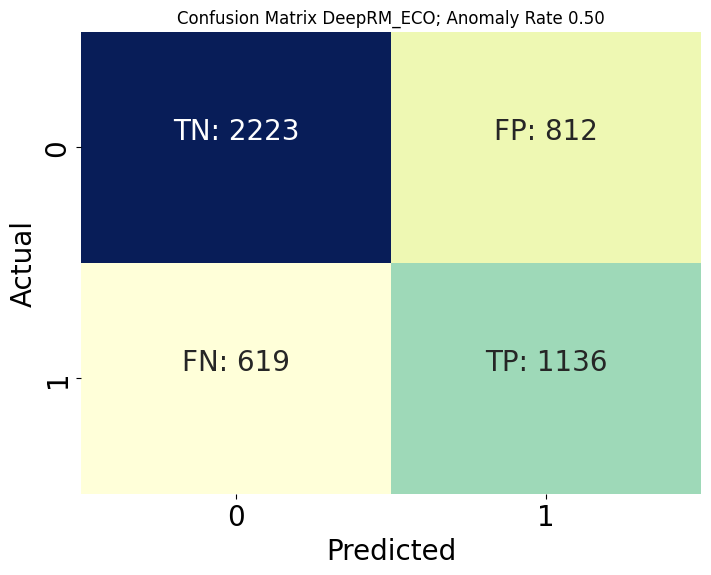

In [51]:
# Confusion matrix
confusion_RME2_050 = [[TN_RME2_050, FP_RME2_050],
                [FN_RME2_050, TP_RME2_050]]

labels = [['TN: {}\n'.format(TN_RME2_050), 'FP: {}\n'.format(FP_RME2_050)], 
          ['FN: {}\n'.format(FN_RME2_050), 'TP: {}\n'.format(TP_RME2_050)]]

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_RME2_050, annot=labels, fmt='', cmap='YlGnBu', cbar=False, annot_kws={"size": 20})
plt.title('Confusion Matrix DeepRM_ECO; Anomaly Rate 0.50')
plt.ylabel('Actual', fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

##### Two-Proportion Z-Test

In [52]:
from statsmodels.stats.proportion import proportions_ztest

# Correct classifications for each model
correct_RM2_010 = TN_RM2_010 + TP_RM2_010
total_RM2_010 = TN_RM2_010 + TP_RM2_010 + FN_RM2_010 + FP_RM2_010

correct_RME2_010 = TN_RME2_010 + TP_RME2_010
total_RME2_010 = TN_RME2_010 + TP_RME2_010 + FN_RME2_010 + FP_RME2_010

count_010 = np.array([correct_RM2_010, correct_RME2_010])
nobs_010 = np.array([total_RM2_010, total_RME2_010])

# Perform the two-proportion z-test
stat_010, pval_010 = proportions_ztest(count_010, nobs_010)

print('Statistic:', stat_010)
print('p-value:', pval_010)

Statistic: 17.0045011969359
p-value: 7.604971326766856e-65


In [53]:
# Correct classifications for each model
correct_RM2_025 = TN_RM2_025 + TP_RM2_025
total_RM2_025 = TN_RM2_025 + TP_RM2_025 + FN_RM2_025 + FP_RM2_025

correct_RME2_025 = TN_RME2_025 + TP_RME2_025
total_RME2_025 = TN_RME2_025 + TP_RME2_025 + FN_RME2_025 + FP_RME2_025

count_025 = np.array([correct_RM2_025, correct_RME2_025])
nobs_025 = np.array([total_RM2_025, total_RME2_025])

# Perform the two-proportion z-test
stat_025, pval_025 = proportions_ztest(count_025, nobs_025)

print('Statistic:', stat_025)
print('p-value:', pval_025)

Statistic: 11.27506291850106
p-value: 1.7425400131420568e-29


In [54]:
# Correct classifications for each model
correct_RM2_050 = TN_RM2_050 + TP_RM2_050
total_RM2_050 = TN_RM2_050 + TP_RM2_050 + FN_RM2_050 + FP_RM2_050

correct_RME2_050 = TN_RME2_050 + TP_RME2_050
total_RME2_050 = TN_RME2_050 + TP_RME2_050 + FN_RME2_050 + FP_RME2_050

count_050 = np.array([correct_RM2_050, correct_RME2_050])
nobs_050 = np.array([total_RM2_050, total_RME2_050])

# Perform the two-proportion z-test
stat_050, pval_050 = proportions_ztest(count_050, nobs_050)

print('Statistic:', stat_050)
print('p-value:', pval_050)

Statistic: 9.55819599535729
p-value: 1.1982713074771299e-21
